In [73]:
import numpy as np

E = np.genfromtxt('edata.txt', delimiter=',')
m = np.genfromtxt('magdata.txt', delimiter=',')
t = np.genfromtxt('tdata.txt', delimiter=',')

In [ ]:
print(f'''
Magnetisation:
{m.mean(axis=1)}
{m.std(axis=1)}

Energy:
{E.mean(axis=1)}
{E.std(axis=1)}

Temperature:
{t}
''')

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np

# --- Replace these placeholders with your actual data ---
# Ensure these are NumPy arrays for the calculations to work

m_mean = m.mean(axis=1)
m_std =  m.std(axis=1)/pow(m.shape[0],0.5)
E_mean = E.mean(axis=1)
E_std = E.std(axis=1)/pow(E.shape[0],0.5)

# --------------------------------------------------------

# Create a figure with two subplots, one on top of the other
# 'sharex=True' links the x-axis for both plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# --- Plot 1: Magnetization vs. Temperature ---
ax1.plot(t, m_mean, label='Mean Magnetization', color='blue')
ax1.fill_between(t, m_mean - m_std, m_mean + m_std, 
                 color='blue', alpha=0.2, label='± 1 std dev')
ax1.set_ylabel('Magnetization')
ax1.set_title('Magnetization and Energy vs. Temperature')
ax1.legend()
ax1.grid(True)

# --- Plot 2: Energy vs. Temperature ---
ax2.plot(t, E_mean, label='Mean Energy', color='red')
ax2.fill_between(t, E_mean - E_std, E_mean + E_std, 
                 color='red', alpha=0.2, label='± 1 std dev')
ax2.set_xlabel('Temperature')
ax2.set_ylabel('Energy')
ax2.legend()
ax2.grid(True)

# Show the plot
plt.tight_layout()
plt.show()




Magnetisation:
[-0.84973148 -0.84537808 -0.82706378 -0.80278974 -0.70465882 -0.62014414
 -0.47086364 -0.31092642 -0.27192962 -0.22565474]
[0.01514242 0.01671996 0.02064361 0.0354632  0.11934466 0.13140047
 0.1269704  0.12854134 0.12303389 0.10770435]

Energy:
[0.18370827 0.18446025 0.19204832 0.2093197  0.24873739 0.26312197
 0.30250251 0.35186826 0.36868989 0.39077253]
[0.00497473 0.00512709 0.0068492  0.0100137  0.02868439 0.02086154
 0.01199718 0.01682948 0.02092371 0.01902094]

Temperature:
[2.   2.05 2.1  2.15 2.2  2.25 2.3  2.35 2.4  2.45]



AttributeError: 'numpy.ndarray' object has no attribute 'stderr'

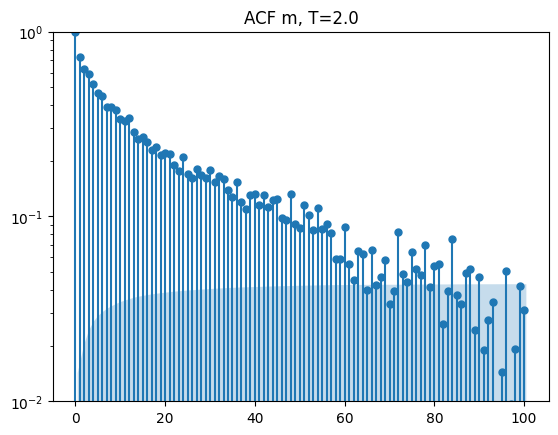

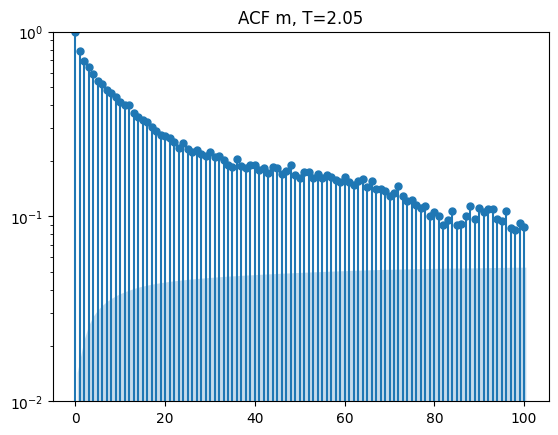

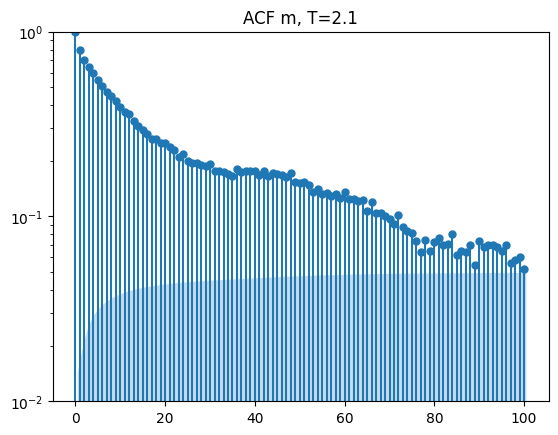

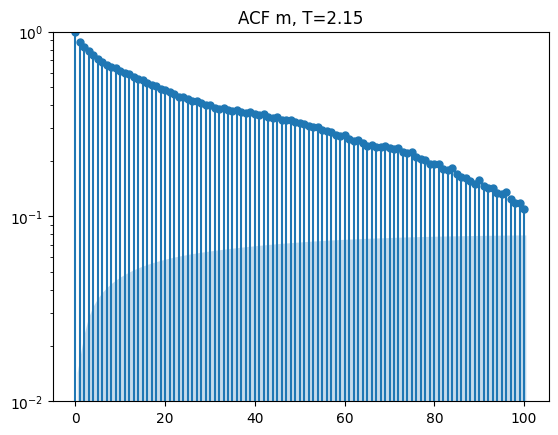

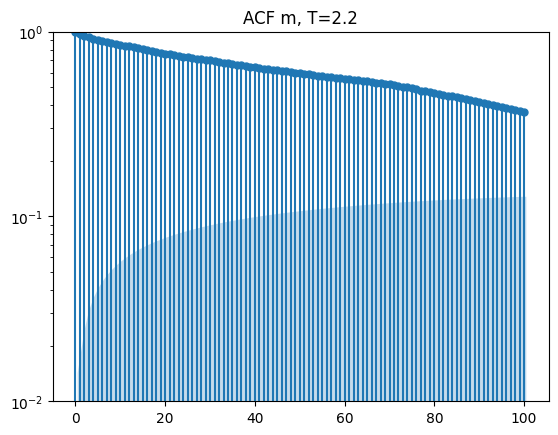

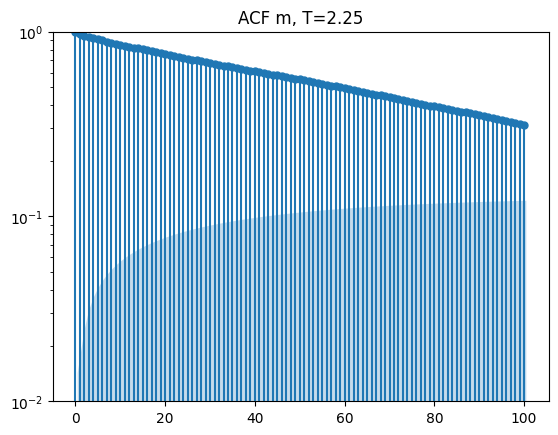

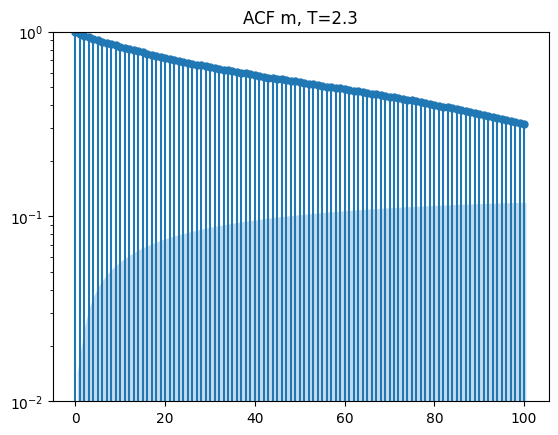

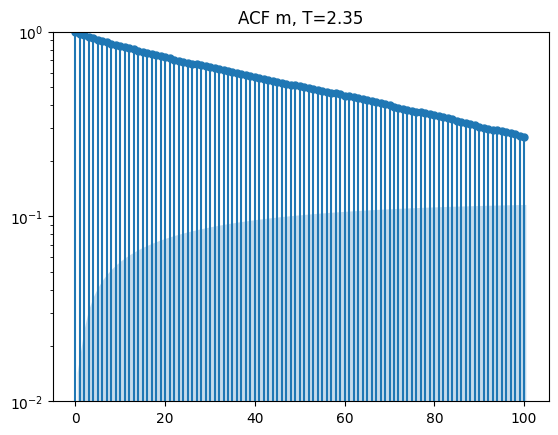

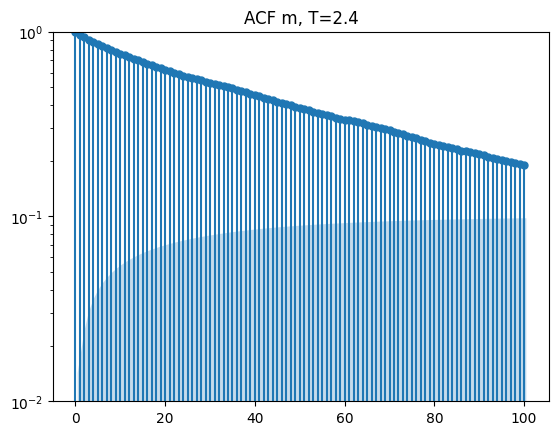

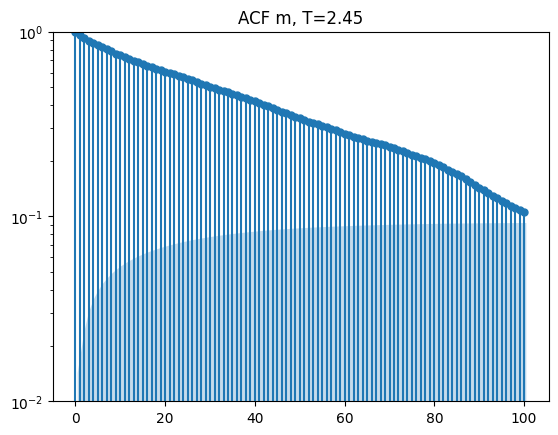

0

In [79]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

#for i in range(len(t)):
#    plot_acf(E[i], lags=1000, title=f'ACF E, T={t[i]}') 

import pandas as pd



for i in range(len(t)):


    df = pd.DataFrame({'original':m[i]})

    df['low_freq_noise'] = df['original'].rolling(window=1000, center=True).mean()

    df['small_noise'] = df['original'] - df['low_freq_noise']

    fig = plot_acf(df['small_noise'].dropna(), lags=100, title=f'ACF m, T={t[i]}') 
    ax = fig.gca()
    ax.set_yscale('log')

    ax.set_ylim(bottom=0.01) 

    plt.show()

0